# Assignment: Linear Models
## Do three questions. Q1, Q2, Q4

### `! git clone https://github.com/ds4e/linearModels`

`**Q1.** Please answer the following questions in your own words.`

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?


1. A "linear" model refers to a model where the output is a linear combination of the input variables. It assumes a straight line relationship between the inputs and outputs. The key idea is that the effect of each input on the output is additive and proportional- changing an input by a certain amount will change the output by a fixed, constant amount.




2. When interpreting the coefficient for a dummy (or one-hot-encoded) variable, the key is understanding that the dummy variable represents a category or group. The coefficient for the dummy variable tells you how much the outcome (dependent variable) changes when the observation belongs to that category, relative to the reference category. The trick lies in how the intercept is handled in the model. When you include a dummy variable in a regression model, you must drop one category to avoid perfect multicollinearity (the "dummy variable trap"). The dropped category is called the reference category or baseline. Therefore, the coefficient for a dummy variable shows the difference in the outcome compared to the reference category. The intercept corresponds to the outcome for the reference category.

3. No, linear regression is designed for regression (predicting continuous values) rather than classification (predicting categories), which is why it’s typically not used for classification tasks. Instead, models like logistic regression or decision trees are preferred for classification.




4. There are manhy signs that a model is overfitting. For one, if a model performs very well on the training data (e.g., low training error) but performs poorly on the test data (e.g., high test error), it’s a clear sign of overfitting. The model is memorizing the training data but failing to generalize to unseen data. Another reason could be if the model has a large number of features or overly complex terms (like high-degree polynomials), it may fit noise in the data rather than the actual underlying patterns. Also, if the model's performance on cross-validation (where the data is split into different sets) is much worse than on the training data, it indicates overfitting.

5. Multicollinearity occurs when two or more independent variables in a linear regression model are highly correlated, meaning they provide redundant information about the outcome. This can cause problems in estimating the model coefficients, making them unstable or difficult to interpret.
The Two-Stage Least Squares technique is used to address issues like multicollinearity and endogeneity in regression models. It works in two stages:

- First Stage: The problematic, correlated independent variables are regressed on other exogenous variables (those not correlated with the outcome). This creates fitted values that capture the relationship without the multicollinearity.

- Second Stage: These fitted values are then used as the predictors in the original regression model, replacing the collinear variables.


  This method makes the model more reliable by removing the correlation between predictors, which helps produce more accurate coefficient estimates.





6. To capture nonlinear relationships, you can either modify your features or switch to more complex models that inherently model nonlinearity. You can transform your input features to better reflect the underlying nonlinear patterns. This includes adding polynomial terms or applying logarithmic/exponential transformations. This approach works well when you suspect a specific form of nonlinearity in the data.If feature transformations aren't enough, you can use models that inherently capture nonlinearity. Decision trees split the data based on different feature thresholds, allowing them to capture complex, piecewise relationships. Random forests and gradient boosting methods take this further by combining multiple trees to improve predictive accuracy.

7. The intercept in a regression model represents the predicted value of the dependent variable when all independent variables are equal to zero. Essentially, it is the starting point or baseline value of the outcome when no predictors are affecting it. The slope coefficient for a variable represents the amount by which the dependent variable changes when the independent variable changes by one unit, holding all other variables constant. The coefficient for a dummy (or one-hot-encoded) variable indicates how much the dependent variable changes when the variable is in the category represented by the dummy, relative to the reference category (the category omitted from the model). The reference category’s impact is captured by the intercept.


**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented


1. Compute the average prices and scores by Neighbourhood; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood.

1.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# URL of the CSV file
url = 'https://raw.githubusercontent.com/ds4e/linearModels/main/data/Q1_clean.csv'

# Reading the CSV file into a DataFrame
clean = pd.read_csv(url)

# A. Compute the Average Prices and Scores by Neighbourhood
avg_prices_scores = clean.groupby('Neighbourhood ')[['Price', 'Review Scores Rating']].mean()
print("Average Prices and Scores by Neighbourhood:")
print(avg_prices_scores)

# B. Identify the Borough with the Highest Average Price
# Assuming that the 'Borough' column is available (if it's not, skip this step)
avg_price_borough = clean.groupby('Neighbourhood ')['Price'].mean()
most_expensive_borough = avg_price_borough.idxmax()
highest_avg_price = avg_price_borough.max()
print(f"\nThe most expensive neighbourhood is {most_expensive_borough} with an average price of {highest_avg_price}")


Average Prices and Scores by Neighbourhood:
                     Price  Review Scores Rating
Neighbourhood                                   
Bronx            75.276498             91.654378
Brooklyn        127.747378             92.363497
Manhattan       183.664286             91.801496
Queens           96.857233             91.549057
Staten Island   146.166667             90.843750

The most expensive neighbourhood is Manhattan with an average price of 183.6642863215166


In [ ]:
print(clean.columns)

Index(['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type',
       'Room Type'],
      dtype='object')


Unique Neighbourhood values: ['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']


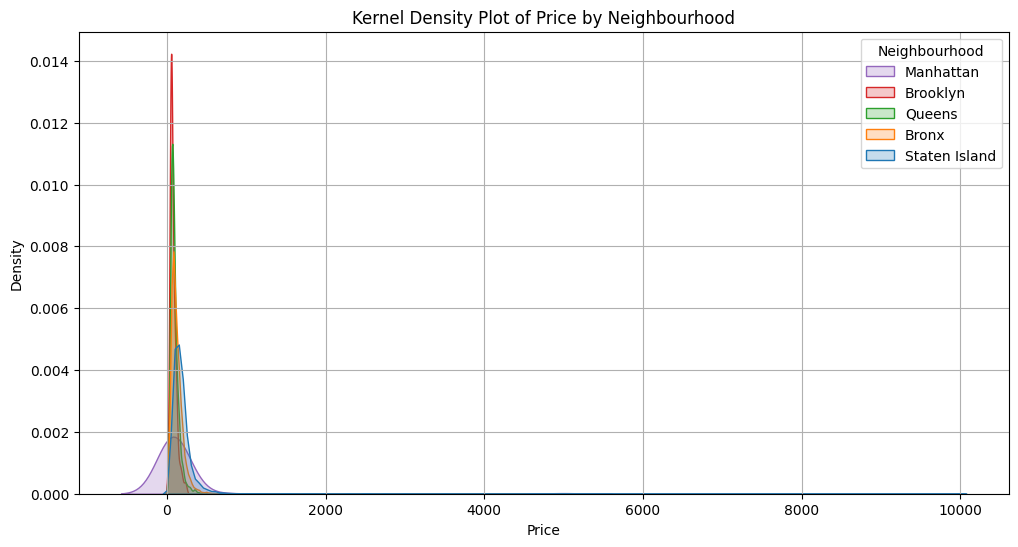

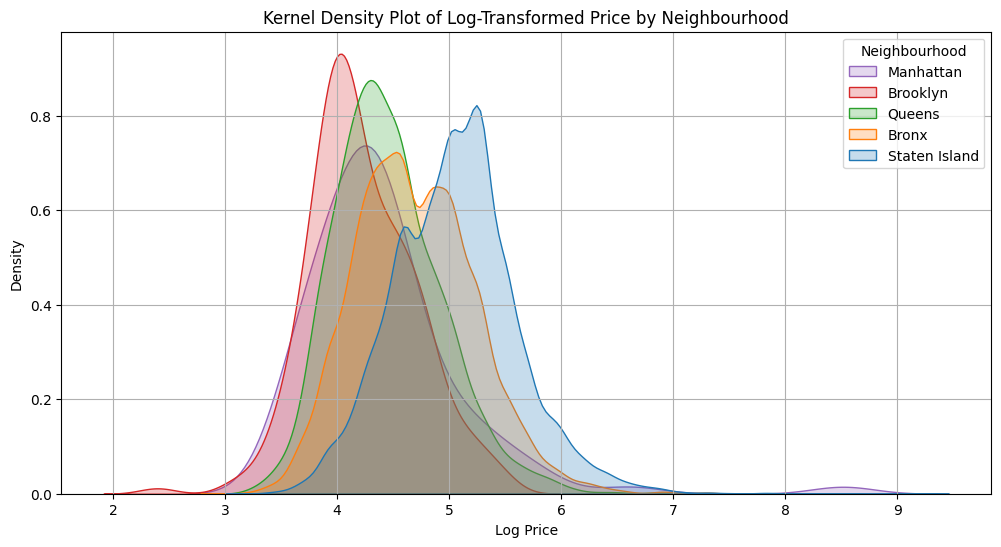

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# URL of the CSV file
url = 'https://raw.githubusercontent.com/ds4e/linearModels/main/data/Q1_clean.csv'

# Reading the CSV file into a DataFrame
clean = pd.read_csv(url)

# Strip spaces from column names
clean.columns = clean.columns.str.strip()

# Check unique values in Neighbourhood (for debugging)
print("Unique Neighbourhood values:", clean['Neighbourhood'].unique())

# Creating log-transformed price column
clean['Log Price'] = np.log(clean['Price'] + 1)  # Avoid log(0)

# Set figure size
plt.figure(figsize=(12, 6))

# KDE Plot for Price
sns.kdeplot(data=clean, x="Price", hue="Neighbourhood", fill=True, common_norm=False)

plt.title("Kernel Density Plot of Price by Neighbourhood")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(title="Neighbourhood", labels=clean['Neighbourhood'].unique())  # Fix legend
plt.grid(True)
plt.show()

# Set figure size
plt.figure(figsize=(12, 6))

# KDE Plot for Log-Transformed Price
sns.kdeplot(data=clean, x="Log Price", hue="Neighbourhood", fill=True, common_norm=False)

plt.title("Kernel Density Plot of Log-Transformed Price by Neighbourhood")
plt.xlabel("Log Price")
plt.ylabel("Density")
plt.legend(title="Neighbourhood", labels=clean['Neighbourhood'].unique())  # Fix legend
plt.grid(True)
plt.show()


2. Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [ ]:
import statsmodels.api as sm
import pandas as pd

# One-hot encode Neighbourhood without an intercept
clean_encoded = pd.get_dummies(clean, columns=['Neighbourhood'], drop_first=False)

# Define independent variables (all Neighbourhood dummies) and dependent variable (Price)
X = clean_encoded[['Neighbourhood_Bronx', 'Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',
                   'Neighbourhood_Queens', 'Neighbourhood_Staten Island']]
y = clean['Price']

# Fit OLS regression model **without intercept**
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        17:00:11   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Neighbourhood_Bron

I observe several patterns from our analysis. In a regression of a continuous variable on a categorical variable, the coefficients represent the category averages—in this case, the average price for each neighborhood. As expected, Manhattan has the highest average price at $183.6, while the Bronx has the lowest, making it the most affordable area. Additionally, the low R-squared value indicates that neighborhood alone is a weak predictor of price, suggesting that other factors significantly influence listing prices.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [ ]:
import statsmodels.api as sm
import pandas as pd

# One-hot encode Neighbourhood with an intercept (drop one category)
clean_encoded = pd.get_dummies(clean, columns=['Neighbourhood'], drop_first=True)

# Define independent variables (dummies excluding the dropped category) and dependent variable (Price)
X = clean_encoded[['Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',
                   'Neighbourhood_Queens', 'Neighbourhood_Staten Island']]
y = clean['Price']

# Convert the Neighbourhood_* columns to integers (1 and 0)
X[['Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',
   'Neighbourhood_Queens', 'Neighbourhood_Staten Island']] = X[['Neighbourhood_Brooklyn',
                                                                 'Neighbourhood_Manhattan',
                                                                 'Neighbourhood_Queens',
                                                                 'Neighbourhood_Staten Island']].astype(int)

# Add constant to the model for intercept
X = sm.add_constant(X)

# Fit OLS regression model **with intercept**
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        17:14:29   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<ipython-input-15-8f795ec99b87>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',


We handle the creation of the dummies differently here than the last question. In the last question, we created the dummy variables for all of the neighbourhood categories without an intercept. That means that all the categories were included, and the model had to account for the baseline category implicitly. However, now, we included an intercept so we had to drop one of the categories when creating the dummy variables. The dropped category ("bronx") is now a reference group against the other categories.

The intercept is 75.2765, which represents the average price of houses in the baseline neighbourhood, AKA the Bronx. The coefficients represent the difference in price between the baseline category (Bronx) and the other neighbourhoods.

Neighbourhood_Brooklyn: 52.4709
Houses in Brooklyn are, on average, $52,470.90 more expensive than houses in the Bronx.

Neighbourhood_Manhattan: 108.3878
Houses in Manhattan are, on average, $108,387.80 more expensive than houses in the Bronx.

Neighbourhood_Queens: 21.5807
Houses in Queens are, on average, $21,580.70 more expensive than houses in the Bronx.

Neighbourhood_Staten Island: 70.8902
Houses in Staten Island are, on average, $70,890.20 more expensive than houses in the Bronx.

To get the coefficients from part 2, you can just add the intercept (75.2765) to the current coefficients. Eg: For Brooklyn: 52.4709 + 75.2765 = 127.7474




4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encode Neighbourhood with an intercept (drop one category)
clean_encoded = pd.get_dummies(clean, columns=['Neighbourhood'], drop_first=True)

# Ensure Price and Review Scores Rating are numeric
clean_encoded['Price'] = pd.to_numeric(clean_encoded['Price'], errors='coerce')
clean_encoded['Review Scores Rating'] = pd.to_numeric(clean_encoded['Review Scores Rating'], errors='coerce')

# Drop rows with NaN values in 'Price' or 'Review Scores Rating' columns
clean_encoded = clean_encoded.dropna(subset=['Price', 'Review Scores Rating'])

# Define independent variables (Review Scores Rating and dummies for Neighbourhood) and dependent variable (Price)
X = clean_encoded[['Review Scores Rating', 'Neighbourhood_Brooklyn',
                   'Neighbourhood_Manhattan', 'Neighbourhood_Queens',
                   'Neighbourhood_Staten Island']]
y = clean_encoded['Price']

# Convert the Neighbourhood_* columns to integers (1 and 0)
X[['Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',
   'Neighbourhood_Queens', 'Neighbourhood_Staten Island']] = X[['Neighbourhood_Brooklyn',
                                                                 'Neighbourhood_Manhattan',
                                                                 'Neighbourhood_Queens',
                                                                 'Neighbourhood_Staten Island']].astype(int)

# Add constant to the model for intercept
X = sm.add_constant(X)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit OLS regression model **with intercept** on training set
model = sm.OLS(y_train, X_train).fit()

# Predict on test set
y_pred_test = model.predict(X_test)

# Calculate R^2 and RMSE on the test set
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print results
print(model.summary())
print(f"R^2 on the test set: {r2_test:.4f}")
print(f"RMSE on the test set: {rmse_test:.4f}")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     189.8
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          1.33e-197
Time:                        17:36:59   Log-Likelihood:            -1.1348e+05
No. Observations:               17722   AIC:                         2.270e+05
Df Residuals:                   17716   BIC:                         2.270e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<ipython-input-18-e4d69a6b7246>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan',


The R^2 value on the test set is 0.0459. The RMSE value on the test set is 140.9182. The coefficient on Review Scores Rating is 1.2119, which means that a 1-point increase in review scores is associated with an increase of 1.21 in rental price, holding other factors constant. Manhattan has the highest coefficient (107.41), meaning it’s the most expensive location.

5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encode Neighbourhood and Property Type (drop first category for each)
clean_encoded = pd.get_dummies(clean, columns=['Neighbourhood', 'Property Type'], drop_first=True)

# Ensure Price and Review Scores Rating are numeric
clean_encoded['Price'] = pd.to_numeric(clean_encoded['Price'], errors='coerce')
clean_encoded['Review Scores Rating'] = pd.to_numeric(clean_encoded['Review Scores Rating'], errors='coerce')

# Drop rows with NaN values in relevant columns
clean_encoded = clean_encoded.dropna(subset=['Price', 'Review Scores Rating'])

# Define independent variables (Review Scores Rating, Neighbourhood, and Property Type dummies) and dependent variable (Price)
X = clean_encoded[['Review Scores Rating'] +
                  [col for col in clean_encoded.columns if 'Neighbourhood_' in col or 'Property Type_' in col]]
y = clean_encoded['Price']

# Convert all categorical dummy variables to integer (1s and 0s)
X = X.astype(int)

# Add constant to the model for intercept
X = sm.add_constant(X)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit OLS regression model **with intercept** on training set
model = sm.OLS(y_train, X_train).fit()

# Predict on test set
y_pred_test = model.predict(X_test)

# Calculate R^2 and RMSE on the test set
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print results
print(model.summary())
print(f"R^2 on the test set: {r2_test:.4f}")
print(f"RMSE on the test set: {rmse_test:.4f}")

# Extract the coefficient on Review Scores Rating
review_score_coef = model.params['Review Scores Rating']
print(f"Coefficient on Review Scores Rating: {review_score_coef:.4f}")

# Find the most expensive property type
property_coeffs = model.params.filter(like="Property Type_")
most_expensive_property = property_coeffs.idxmax()
highest_price = property_coeffs.max()
print(f"Most expensive property type: {most_expensive_property} (${highest_price:.2f})")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     51.46
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          2.52e-218
Time:                        18:01:20   Log-Likelihood:            -1.1339e+05
No. Observations:               17722   AIC:                         2.268e+05
Df Residuals:                   17699   BIC:                         2.270e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

R² on the test set: 0.0542

RMSE on the test set: 140.3027

Coefficient on Review Scores Rating: 1.2010 (which means a 1-point increase in review scores is associated with a 1.20 increase in price, on average)

Most expensive property type: Bungalow ($83.97 premium)

6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

The coefficient on Review Scores Rating represents the effect of a 1-point increase in the review score on the dependent variable, which in this case is Price.
Part 4: The coefficient on Review Scores Rating is 1.2119.
Part 5: The coefficient on Review Scores Rating is 1.2010.

The change in the coefficient from 1.2119 in Part 4 to 1.2010 in Part 5 is a decrease of 0.0109. This suggests that after adding more variables to the model (including various property types), the effect of Review Scores Rating on Price has slightly decreased.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [24]:
import pandas as pd

# Updated URL to the CSV file on GitHub
url1 = 'https://raw.githubusercontent.com/ds4e/linearModels/main/assignment/data/heart_hw.csv'

# Reading the CSV file into a DataFrame
heart = pd.read_csv(url1)

# Show the first few rows of the dataframe
print(heart.head())



   Unnamed: 0  age transplant  y
0           1   53    control  0
1           2   43    control  0
2           3   52    control  0
3           4   52    control  0
4           5   54    control  0


1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the average treatment effect.

In [25]:
# Convert the 'transplant' column from categorical text to numeric
heart['transplant'] = heart['transplant'].map({'control': 0, 'treatment': 1})

# Compute survival proportions
control_survival_rate = heart[heart['transplant'] == 0]['y'].mean()
treatment_survival_rate = heart[heart['transplant'] == 1]['y'].mean()
ate = treatment_survival_rate - control_survival_rate

print(f"Proportion of survival in control group: {control_survival_rate:.4f}")
print(f"Proportion of survival in treatment group: {treatment_survival_rate:.4f}")
print(f"Average Treatment Effect (ATE): {ate:.4f}")



Proportion of survival in control group: 0.1176
Proportion of survival in treatment group: 0.3478
Average Treatment Effect (ATE): 0.2302


2. Regress y on transplant using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.

In [26]:
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(heart['transplant'])  # Adds a column of ones for the intercept
y = heart['y']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Mon, 24 Mar 2025   Prob (F-statistic):             0.0133
Time:                        17:31:49   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1176      0.075      1.574      0.1

3. We'd like to include age in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress y on a constant, transplant, and age. How does the intercept change?

In [30]:
import statsmodels.api as sm

# Ensure no missing values in 'transplant', 'age', or 'y'
heart_cleaned = heart.dropna(subset=['transplant', 'y', 'age'])

# Define independent (X) and dependent (y) variables
X = heart_cleaned[['transplant', 'age']]  # Include both transplant and age as predictors
X = sm.add_constant(X)  # Adds an intercept column
y = heart_cleaned['y']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.602
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           0.000357
Time:                        17:32:30   Log-Likelihood:                -54.558
No. Observations:                 103   AIC:                             115.1
Df Residuals:                     100   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7020      0.196      3.583      0.0

The intercept increased significantly from 0.1176 to 0.7020 because now it reflects survival at age 0. Since age is expected to reduce survival probability, the effect of age is captured by the new coefficient for age. The addition of age has reduced the survival rate for older patients, as shown by the negative coefficient for age (-0.0136). This means that for every year increase in age, the survival probability decreases by 1.36%.

The coefficient for transplant increased slightly from 0.2302 to 0.2647, suggesting that the effect of transplant on survival is slightly stronger once age is accounted for.



It appears that the proportion of survival in the control group (from Part 1) matches the intercept (0.1176), which represents the survival rate for individuals who did not receive a transplant. This happens because in a regression of a binary variable (like survival) on a categorical variable (like transplant), the intercept corresponds to the average outcome for the reference group. The coefficient on transplant represents the difference in survival rates between the treatment (transplant) and control groups. The coefficient indicates that individuals who received a heart transplant have a 23.02% higher probability of surviving compared to those who did not receive a transplant. This is equivalent to the Average Treatment Effect from Part 1.

4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.

Accuracy: 0.6667


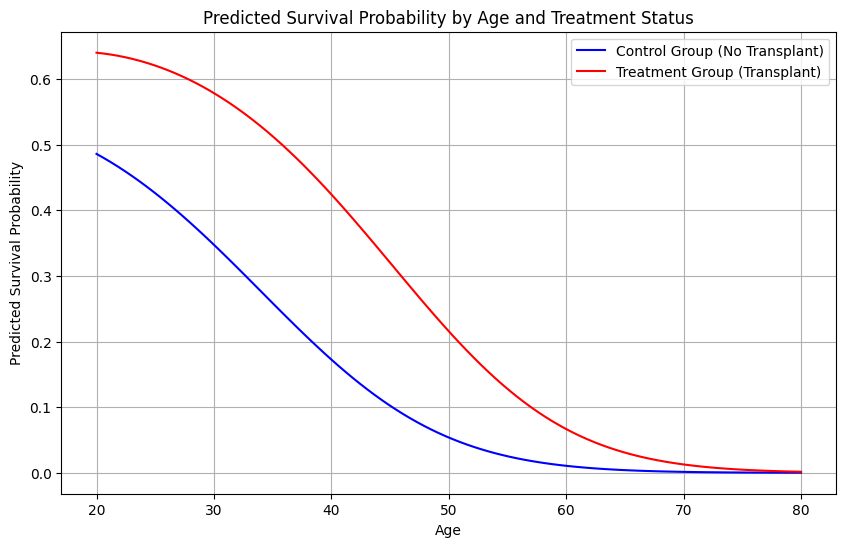

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create non-linear terms for age (age^2) and interaction term (age * transplant)
heart_cleaned['age_squared'] = heart_cleaned['age'] ** 2
heart_cleaned['age_transplant_interaction'] = heart_cleaned['age'] * heart_cleaned['transplant']

# Define independent (X) and dependent (y) variables
X = heart_cleaned[['transplant', 'age', 'age_squared', 'age_transplant_interaction']]
X = sm.add_constant(X)  # Adds an intercept column
y = heart_cleaned['y']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict the survival probability on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Now, let's plot the survival probability by age, conditional on receiving a transplant or not
# Create a range of ages for predictions
age_range = np.linspace(20, 80, 100)  # Age range for plotting

# Create data for both control (transplant=0) and treatment (transplant=1)
X_plot = pd.DataFrame({
    'const': 1,
    'transplant': [0]*100 + [1]*100,  # 0 for control, 1 for treatment
    'age': np.tile(age_range, 2),  # Age values repeated for control and treatment
    'age_squared': np.tile(age_range, 2) ** 2,
    'age_transplant_interaction': np.tile(age_range, 2) * np.concatenate([np.zeros(100), np.ones(100)])
})

# Predict the survival probabilities
y_plot_prob = model.predict_proba(X_plot)[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(age_range, y_plot_prob[:100], label='Control Group (No Transplant)', color='blue')
plt.plot(age_range, y_plot_prob[100:], label='Treatment Group (Transplant)', color='red')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival Probability by Age and Treatment Status')
plt.legend()
plt.grid(True)
plt.show()


From this model, I observe that overall, receiving a transplant (treatment group) increases the chances of survival. However, this effect is more pronounced in younger patients, as the survival benefit from the transplant diminishes with increasing age.  While age still negatively impacts survival probability, the transplant helps moderate this decline. The model's accuracy is 0.6667, indicating that it provides a moderately reliable prediction of survival.

5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

There are several concerns I would have. First, I worry that doctors might over-rely on the model, potentially overlooking other critical risk factors that require human judgment. Additionally, this raises an important question—should survival probability be the only criterion? What about quality of life, family support, or a patient’s willingness to follow post-transplant care? These factors could significantly impact long-term outcomes and should not be ignored in the decision-making process.